In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn


In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
# to convert boston.data into a pandas data frame

df=pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# the column names are just numbers, so to replace those numbers with the feature names.

df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
#boston.target contains the housing prices.

boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [55]:
 #to add these target prices to the data frame df.

df['PRICE']=boston.target
df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Scikit Learn

In this section I am going to  fit a linear regression model and predict the Boston housing prices. I will use the least squares method as the way to estimate the coefficients.

Y = boston housing price(also called “target” data in Python)

and

X = all the other features (or independent variables)

### First, I am going to import linear regression from sci-kit learn module. 
### Then I am going to drop the price column as I want only the parameters as my X values.  
###  I am going to store linear regression object in a variable called lm.

In [56]:
from sklearn.linear_model import LinearRegression
X=df.drop('PRICE',axis =1)

In [57]:
#This creats a linear regression object
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

If you want to look inside the linear regression object, you can do so by typing LinearRegression.
and the press <tab> key. This will give a list of functions available inside linear regression object.

In [58]:
LinearRegression.

SyntaxError: invalid syntax (<ipython-input-58-31fa066c2e3b>, line 1)

Important functions to keep in mind while fitting a linear regression model are:

lm.fit() -> fits a linear model

lm.predict() -> Predict Y using the linear model with estimated coefficients

lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 

You can also explore the functions inside lm object by pressing lm.<tab>

In [59]:
lm.

SyntaxError: invalid syntax (<ipython-input-59-28f3ebd1cac7>, line 1)

.coef_  gives the coefficients and .intercept_  gives the estimated intercepts.

## Fitting a Linear Model

I am going to use all 13 parameters to fit a linear regression  model.  Two other parameters that you can pass to linear regression object are fit_intercept and normalize.

In [60]:
model=lm.fit(X,df.PRICE)

In [61]:
lm.intercept_

36.491103280363404

In [62]:
lm.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [63]:
print('no of coefficients:',len(lm.coef_))

no of coefficients: 13


In [64]:
lm.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

 ### Then construct a data frame that contains features and estimated coefficients.

In [68]:
#pd.DataFrame(zip(X.columns,lm.coef_), columns=["features","Estimated coefficients"])
pd.DataFrame(zip(X.columns,lm.coef_),columns=["features","Estimated coefficients"])

TypeError: data argument can't be an iterator

As you can see from the data frame that there is a high correlation between RM and prices.
Lets plot a scatter plot between True housing prices and True RM.

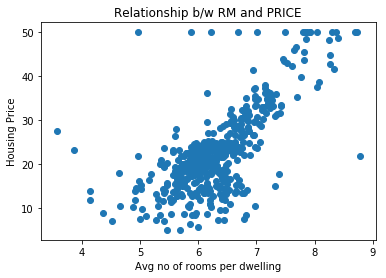

In [75]:
plt.scatter(df.RM,df.PRICE)
plt.xlabel("Avg no of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship b/w RM and PRICE")
plt.show()

As you can see that there is a positive correlation between RM and housing prices.